# HW0004 Edge Detection

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read(datasets='train'):
    prefix = "datasets/"
    if datasets == 'train':
        images_fname = prefix + "train-images-idx3-ubyte"
        labels_fname = prefix + "train-labels-idx1-ubyte"
    elif datasets == 'test':
        images_fname = prefix + "t10k-images-idx3-ubyte"
        labels_fname = prefix + "t10k-labels-idx1-ubyte"
    images_file = open(images_fname, mode='rb')
    labels_file = open(labels_fname, mode='rb')
    
    # Read image
    images_file.seek(16)
    dt = np.dtype((np.uint8, (28,28)))
    images = np.fromfile(images_file, dtype=dt)
    
    #Read label
    labels_file.seek(8)
    dt = np.dtype(np.uint8)
    labels = np.fromfile(labels_file, dtype=dt)
    
    return images, labels

## Basic

### Zero padding the first five images to 30 * 30, use Gx and Gy to filter them and print with reversed out

In [3]:
def padding(image, n):
    return np.pad(image, [n, n], mode='edge')

In [4]:
def convolution(image, kernel):
    image_x_size, image_y_size = image.shape
    kernel_x_size, kernel_y_size = kernel.shape
    conv_x_size, conv_y_size = image_x_size - kernel_x_size + 1, image_y_size - kernel_y_size + 1
    conv = np.ndarray((conv_x_size, conv_y_size))
    for i in range(0, conv_x_size):
        for j in range(0, conv_y_size):
            conv[i][j] = np.sum(np.multiply(image[i:i+kernel_x_size, j:j+kernel_y_size], kernel))
    return conv

In [5]:
train_images, train_labels = read()
images = train_images[0:5]
Gx = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])

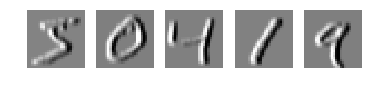

In [6]:
for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(convolution(images[i], Gx), cmap=plt.cm.gray)
    plt.axis('off')
plt.show()

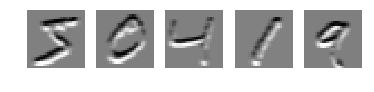

In [7]:
for i in range(len(images)):
    plt.subplot(1, len(images), i + 1)
    plt.imshow(convolution(images[i], Gy), cmap=plt.cm.gray)
    plt.axis('off')
plt.show()

### Use Sobel filter kernel

In [8]:
def sobel_filter_kernel(size):
    sobel = np.zeros((size, size))
    for i in range(size):
        for j in range(size):
            sobel[i][j] = (size // 2) - j
            if j > size // 2:
                sobel[i][j] -= size // 2 - abs(i - size // 2)
            elif j < size // 2:
                sobel[i][j] += size // 2 - abs(i - size // 2)
    return sobel

In [9]:
def print_image(image):
    for i in image:
        for j in i:
            print("{:02X}".format(j), end=' ')
        print()
    print()

### 32 \* 32 image with 5 * 5 sobel filter kernel

In [10]:
image = train_images[0]
padding_image = padding(image, 2) # (32 - 28) / 2 = 2
sobel = sobel_filter_kernel(5)
conv_image = convolution(padding_image, sobel).astype(np.uint8)

print_image(conv_image)

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 FA D9 CA CD 0A A8 50 BF 1E 1B 8B E5 CC F5 6D FE 00 00 
00 00 00 00 00 00 C4 9A 20 8C 69 C6 05 93 E9 C6 75 44 B5 A7 54 41 9E 92 A9 FD 00 00 
00 00 00 00 00 9E 99 70 D8 0B 46 8C DF BC 1B E8 C0 6E 4B B9 85 00 4F D4 70 BC 00 00 
00 00 00 00 00 49 94 6E A8 5E F4 7C 6F EC 96 B3 E2 C2 89 C6 DA D9 62 F2 24 7D 00 00 
00 00 00 00 00 06 06 65 07 3B 0D C2 BC 2D 22 B8 82 B1 1E 38 7F 66 17 A6 D2 BE 00 00 
00 00 00 00 00 25 06 B2 53 96 6E B7 FD B4 AB B0 70 12 08 EB CC 5E 12 9D 3B 80 00 00 
00 00 00 00 00 68 FE E1 CE 29 11 31 01 E6 B2 BE 80 87 40 CC 86 CF DC 97 4E 00 00 00 
00 00 00 00 00 DC 48 7F 74 B9 C7 39 C8 24 51 26 D0 B9 94 B0 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 60 4E 6F CE 0B C9 69 E4 3D 2A B7 D7 C9 36 00 00

### 34 \* 34 image with 7 * 7 sobel filter kernel

In [11]:
padding_image = padding(image, 3) # (34 - 28) / 2 = 3
sobel = sobel_filter_kernel(7)
conv_image = convolution(padding_image, sobel).astype(np.uint8)

print_image(conv_image)

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 00 F7 C4 A3 94 53 72 A4 38 03 57 B0 A6 F2 1A E7 6A E3 7D 00 
00 00 00 00 00 A6 58 80 52 82 2A E1 32 BE A0 71 48 F4 22 71 AF A0 0A 21 7B 22 BC 00 
00 00 00 00 6D 5C 12 01 79 5D 94 89 21 CA ED 90 DD 8B 25 C6 97 06 77 FC DB 10 7B 00 
00 00 00 00 06 6A F5 AD BB 0F A0 8E 53 AD AD 4B C4 D6 F4 73 26 60 EE FB A4 B0 3A 00 
00 00 00 00 C3 50 39 87 8B A0 AC 92 F0 27 EF 59 04 C5 9E C4 E9 C8 E5 C2 83 64 FB 00 
00 00 00 00 80 12 5F F4 1A 04 69 B1 17 02 27 53 D3 C4 65 D3 4E 22 26 25 78 12 3C 00 
00 00 00 00 9F 12 D9 41 C9 9F CE BB EA 52 83 2A 92 DD FA 9A 1D C8 AF 26 AF 72 7D 00 
00 00 00 00 E2 EC 27 38 37 89 6F 09 7B AB 3F E1 F3 0E 55 FA 40 75 5E DC F1 65 C0 00 
00 00 00 00 25 A2 B3 BD 55 A0 AF 6E 4C 4D 6A CF 46 48 20 47 40 E6 D2 8D F6 75 00 00 
00 00 00 00 CA 0B 9B D7 0E 81 E9 27 4C 60 20 4E 7E 8B E4 F2 D6 4B

### 36 \* 36 image with 9 * 9 sobel filter kernel

In [12]:
padding_image = padding(image, 4) # (36 - 28) / 2 = 4
sobel = sobel_filter_kernel(9)
conv_image = convolution(padding_image, sobel).astype(np.uint8)

print_image(conv_image)

00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 00 
00 00 00 00 00 00 00 00 F4 AF 7C 5B 9C 33 B6 3C AC 4F C3 FC 9E 12 D6 4F 02 DF 59 FC 
00 00 00 00 88 16 E0 18 9B 34 DC 93 40 B2 29 A7 CD 7F 91 44 19 3C F9 53 AD E5 9B 7B 
00 00 00 3C 1F B4 48 0B 21 0C 43 FC 96 65 C4 46 18 48 41 DD 70 13 6A 3C F8 A4 B0 3A 
00 00 00 C3 40 AD DC 2C C5 BE 2B 96 EC 19 E6 74 A8 6A 53 AF 53 B1 CE 53 B6 6D 50 F9 
00 00 00 80 D6 05 1C 7E FA 0C 0F CD 29 0A 39 D6 58 D3 CC 35 E9 E4 32 6A 74 36 F0 B8 
00 00 00 3D 5C 99 F7 B2 BF 4E 15 89 33 32 3D 77 EA 9B 11 73 16 47 B8 15 FC 15 A4 79 
00 00 00 FA 1E DB 31 0C A7 2F FD 14 5D 01 D8 29 CF 63 32 E5 1F A2 C6 04 A0 0A 52 BA 
00 00 00 19 1E 55 9D A5 09 35 7E 8D 29 CF B6 8E CA 3D 87 15 98 53 62 ED E2 41 B2 FB 
00 00 00 5C F8 A3 D7 03 F3 9A 92 85 34 2C D0 6D 01 C7 7F CF F4 26 FE D6 24 78 12 3C 
00 00 00 9F 72 C9 BF 09 51 D4 C4 12 96 8B 84 74 53 FF 61 E8 C7 58 17 26 7F 45 8F 00 
00 00 00 E2 46 B3 45 0F 7F 79 73 D1 49 CD DF D9 FF BC 39 4E DD CC